In [1]:
# required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score,roc_curve,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./data.csv")
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
df.shape

(2227, 3)

- The dataset has `2227` rows and `3` columns

In [4]:
# checking missing values
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [5]:
# checking missing values percentage
round(df.isnull().sum()/len(df)*100,2)

x1    0.22
x2    0.13
y     0.00
dtype: float64

- In the data we have missing values. `x1` has `0.22%` and `x2` has `0.13%` 
    - Here missing values are very small so i am droping the missing values. 

In [6]:
# droping missing values
df.dropna(inplace=True)

In [7]:
# again checking missing values
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [8]:
# checking type of attributes
df.dtypes

x1    float64
x2    float64
y       int64
dtype: object

In [9]:
# looking balance / imbalnce
df['y'].value_counts()/len(df)

0    0.557909
1    0.442091
Name: y, dtype: float64

## Data Visualization

<AxesSubplot:xlabel='x1'>

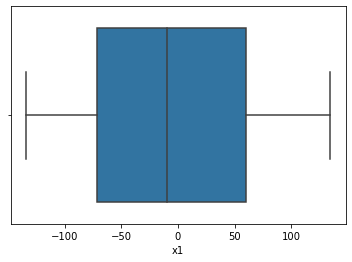

In [10]:
sns.boxplot(x='x1',data=df)

<AxesSubplot:xlabel='x2'>

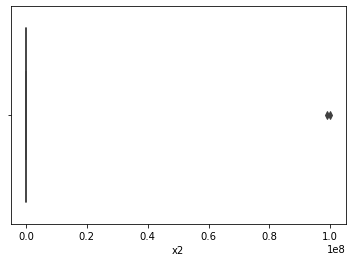

In [11]:
sns.boxplot(x='x2',data=df)

In [12]:
## treating outliers
df["x2"] = winsorize(df["x2"],(0,0.001))

<AxesSubplot:xlabel='x2'>

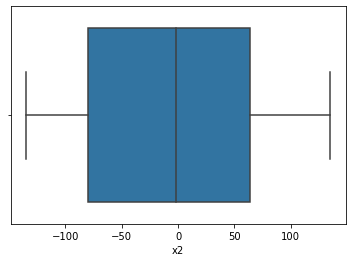

In [13]:
sns.boxplot(x='x2',data=df)

<AxesSubplot:xlabel='x1', ylabel='x2'>

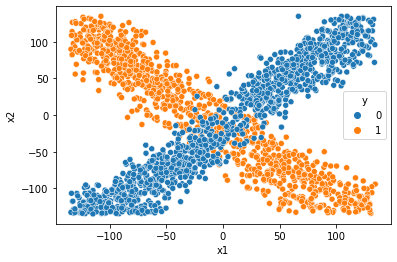

In [14]:
sns.scatterplot(x='x1',y='x2',hue='y',data=df)

<AxesSubplot:xlabel='y', ylabel='count'>

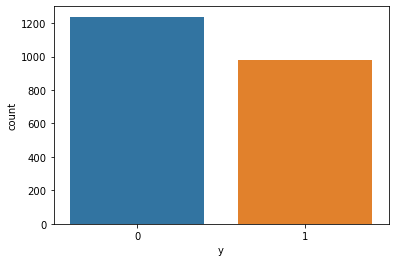

In [15]:
sns.countplot(df['y'])

In [16]:
## deviding data into independent and dependent variables

x = df.drop('y',axis=1)
y = df['y']

In [17]:
# Standardization
sc = StandardScaler()
x = sc.fit_transform(x)

## train test split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1664, 2), (555, 2), (1664,), (555,))

In [20]:
# Accuracy, classification report,roc_curve
def acc_clas_roc(y_test,y_pred,y_pred_prob):
    """Function for accuracy score, classification report and roc_curve"""
    print("Accuracy",accuracy_score(y_test,y_pred),"\n\n")
    print(classification_report(y_test,y_pred))
    fpr,tpr,th = roc_curve(y_test,y_pred_prob[:,1])
    plt.plot(fpr,tpr)
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title('ROC')
    plt.show()

In [21]:
acc_model = []
acc_hyper_models = []

## LogisticRegression

Accuracy 0.7207207207207207 


              precision    recall  f1-score   support

           0       0.67      0.99      0.80       307
           1       0.97      0.39      0.55       248

    accuracy                           0.72       555
   macro avg       0.82      0.69      0.68       555
weighted avg       0.80      0.72      0.69       555



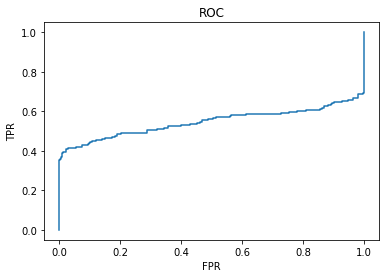

In [23]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)
y_pred_prob = lr_model.predict_proba(x_test)

acc_clas_roc(y_test,y_pred,y_pred_prob)

acc_model.append(accuracy_score(y_test,y_pred))

## SVM with Linear Kernel

Accuracy 0.7045045045045045 


              precision    recall  f1-score   support

           0       0.65      1.00      0.79       307
           1       1.00      0.34      0.51       248

    accuracy                           0.70       555
   macro avg       0.83      0.67      0.65       555
weighted avg       0.81      0.70      0.66       555



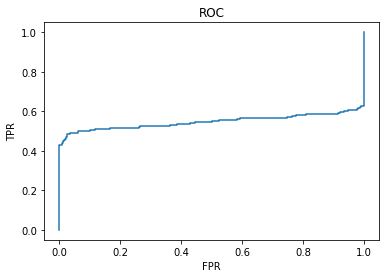

In [25]:
lr_svc = SVC(kernel='linear',probability=True)
lr_svc.fit(x_train,y_train)
y_pred = lr_svc.predict(x_test)
y_pred_prob = lr_svc.predict_proba(x_test)

acc_clas_roc(y_test,y_pred,y_pred_prob)

acc_model.append(accuracy_score(y_test,y_pred))

## SVM with RBF Kernel

Accuracy 0.9387387387387387 


              precision    recall  f1-score   support

           0       0.91      0.98      0.95       307
           1       0.98      0.88      0.93       248

    accuracy                           0.94       555
   macro avg       0.95      0.93      0.94       555
weighted avg       0.94      0.94      0.94       555



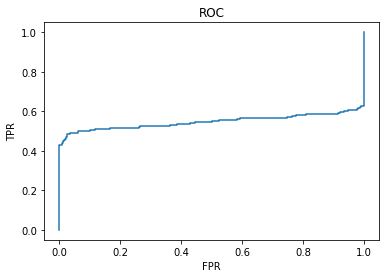

In [26]:
rbf_svc = SVC(kernel='rbf',probability=True)
rbf_svc.fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
y_pred_prob = lr_svc.predict_proba(x_test)

acc_clas_roc(y_test,y_pred,y_pred_prob)

acc_model.append(accuracy_score(y_test,y_pred))

## Decision Tree

Accuracy 0.9333333333333333 


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       307
           1       0.93      0.92      0.93       248

    accuracy                           0.93       555
   macro avg       0.93      0.93      0.93       555
weighted avg       0.93      0.93      0.93       555



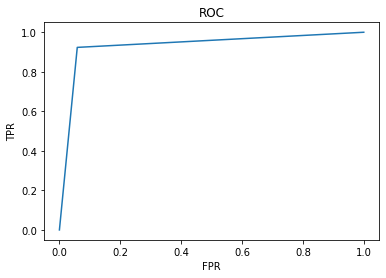

In [27]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
y_pred_prob = dt_model.predict_proba(x_test)

acc_clas_roc(y_test,y_pred,y_pred_prob)

acc_model.append(accuracy_score(y_test,y_pred))

## KNN

Accuracy 0.9423423423423424 


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       307
           1       0.94      0.94      0.94       248

    accuracy                           0.94       555
   macro avg       0.94      0.94      0.94       555
weighted avg       0.94      0.94      0.94       555



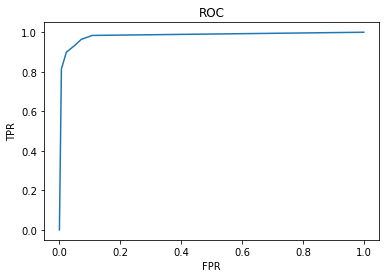

In [28]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_pred = model_knn.predict(x_test)
y_pred_prob = model_knn.predict_proba(x_test)

acc_clas_roc(y_test,y_pred,y_pred_prob)

acc_model.append(accuracy_score(y_test,y_pred))

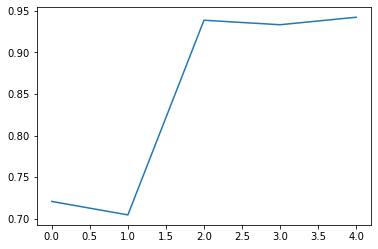

In [47]:
plt.plot(pd.DataFrame(acc_model),kind)#,columns=['logestic','svm_linear','svm_rbf','d_tree','knn'])

In [46]:
vs = pd.DataFrame(columns=['logestic','svm_linear','svm_rbf','d_tree','knn'])
for i in range(len(acc_model)):
    print(vs[i])

KeyError: 0

## hyperparameter tuning

### LogisticRegression

In [29]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_model = LogisticRegression()
param = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr_model, param_grid=param, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.746795 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.746795 (0.024932) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.746795 (0.024932) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.746795 (0.024932) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.746795 (0.024932) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.746795 (0.024932) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.746795 (0.024932) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.746394 (0.025189) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.746394 (0.025189) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.746795 (0.024932) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.746394 (0.024866) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.746394 (0.024866) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.745994 (0.025080) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.732372 (0.021932) wit

Accuracy 0.7207207207207207 


              precision    recall  f1-score   support

           0       0.67      0.99      0.80       307
           1       0.97      0.39      0.55       248

    accuracy                           0.72       555
   macro avg       0.82      0.69      0.68       555
weighted avg       0.80      0.72      0.69       555



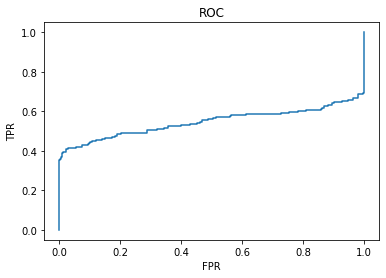

In [30]:
lr_model = grid_result.best_estimator_
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)
y_pred_prob = lr_model.predict_proba(x_test)

acc_clas_roc(y_test,y_pred,y_pred_prob)

acc_hyper_models.append(accuracy_score(y_test,y_pred))

### SVM

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid','linear']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [31]:
model = SVC()
model = grid_result.best_estimator_
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

acc_hyper_models.append(accuracy_score(y_test,y_pred))

## Decision Tree

In [ ]:
param_dist = {"max_depth": [3,5,None],
              "max_features":["auto","sqrt","log2",None],
              "min_samples_leaf": [1,2,3,4],
              "criterion": ["gini", "entropy"]
             }
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_dist, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Accuracy 0.7207207207207207 


              precision    recall  f1-score   support

           0       0.67      0.99      0.80       307
           1       0.97      0.39      0.55       248

    accuracy                           0.72       555
   macro avg       0.82      0.69      0.68       555
weighted avg       0.80      0.72      0.69       555



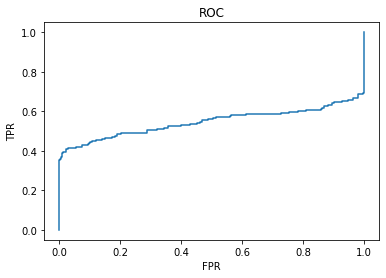

In [32]:
model = DecisionTreeClassifier()
model = grid_result.best_estimator_
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)

acc_clas_roc(y_test,y_pred,y_pred_prob)

acc_hyper_models.append(accuracy_score(y_test,y_pred))

## KNN

In [ ]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Accuracy 0.7207207207207207 


              precision    recall  f1-score   support

           0       0.67      0.99      0.80       307
           1       0.97      0.39      0.55       248

    accuracy                           0.72       555
   macro avg       0.82      0.69      0.68       555
weighted avg       0.80      0.72      0.69       555



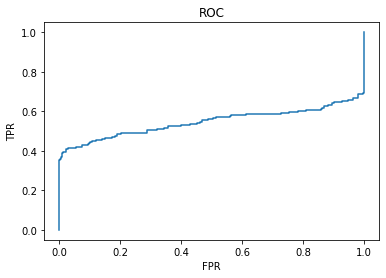

In [33]:
model = KNeighborsClassifier()
model = grid_result.best_estimator_
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)

acc_clas_roc(y_test,y_pred,y_pred_prob)

acc_hyper_models.append(accuracy_score(y_test,y_pred))

In [34]:
acc_hyper_models

[0.7207207207207207,
 0.7207207207207207,
 0.7207207207207207,
 0.7207207207207207]